# NLP Section

---


In [27]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 32.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-06-11 11:36:37.650667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-11 11:36:37.650737: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for S&P500 and create a DataFrame of sentiment scores.

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from datetime import datetime
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\greG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
news_api_key = os.getenv("api_key")


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key = 'd735c6843bb44e4d9d4e7d864d18cae3')


In [4]:
# Fetch the Bitcoin news articles
sp_news_en = newsapi.get_everything(
    q="S&P500",
    language="en"
)

# Show the total number of news
sp_news_en["totalResults"]

229

In [29]:
sp_news_en

{'status': 'ok',
 'totalResults': 229,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': None,
   'title': 'Column: Another leg lower? Markets not yet braced for recession - Reuters',
   'description': "One of the worst starts to a year in decades might lead you to think investors are already braced for an economic storm ahead, but it's far from clear recession risks have been taken on board or are fully priced.",
   'url': 'https://www.reuters.com/markets/europe/another-leg-lower-markets-not-yet-braced-recession-2022-05-27/',
   'urlToImage': 'https://www.reuters.com/pf/resources/images/reuters/reuters-default.png?d=97',
   'publishedAt': '2022-05-27T08:08:00Z',
   'content': "LONDON, May 27 (Reuters) - One of the worst starts to a year in decades might lead you to think investors are already braced for an economic storm ahead, but it's far from clear recession risks have … [+5907 chars]"},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': None,

In [31]:
# Create sentiment scores DataFrame
sp_sentiments = []

for article in sp_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        sp_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
sp_df = pd.DataFrame(sp_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
sp_df = sp_df[cols]

sp_df.head(10)

,date,text,compound,positive,negative,neutral
0,2022-05-27,"LONDON, May 27 (Reuters) - One of the worst st...",-0.6705,0.075,0.196,0.728
1,2022-06-03,June 3 (Reuters) - Asian shares rose broadly o...,0.2247,0.070,0.041,0.889
2,2022-05-25,"LONDON, May 25 (Reuters) - Whatever the broade...",-0.2732,0.000,0.070,0.930
3,2022-05-19,The United Nations has warned that the war in ...,-0.8074,0.060,0.215,0.725
4,2022-05-19,EasyJet narrows losses\r\nEasyjet aircraft at ...,-0.2263,0.100,0.155,0.745
5,2022-06-10,European markets fall amid stagflation fears\r...,-0.7269,0.000,0.191,0.809
6,2022-05-18,In this photo illustration an Alaska Airlines ...,0.0000,0.000,0.000,1.000
7,2022-06-01,BRAZIL - 2022/05/07: In this photo illustratio...,0.0000,0.000,0.000,1.000
8,2022-05-25,In this photo illustration a L'Oreal logo seen...,0.0000,0.000,0.000,1.000
9,2022-05-26,CHINA - 2022/04/29: In this photo illustration...,0.0000,0.000,0.000,1.000


In [7]:
# Describe the Sentiment DF
sp_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.004645,0.043000,0.043400,0.913550
std,0.411350,0.051937,0.077479,0.098133
min,-0.807400,0.000000,0.000000,0.725000
25%,-0.056575,0.000000,0.000000,0.878500
50%,0.000000,0.000000,0.000000,0.921000
75%,0.258825,0.090250,0.048250,1.000000
max,0.743000,0.153000,0.215000,1.000000


---

## 2. Natural Language Processing
---
###   Tokenizer

1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [8]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [9]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

# Expand the default stopwords list if necessary
sw_addons = {'down', 'market', 'bear', 'falls', 'today', 'announced', 'week', 'month', 'lower', 'gain','federal', 'reserve', 'economic'}


In [10]:
# Complete the tokenizer function
def tokenizer(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output
    
  
    
    return tokens

In [11]:
# Compile the list of lists of tokens for each article
sp_word_tokenized = []
for text in sp_df.text:
    # Create a list of tokenized words for each article    
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the sp_word_tokenized list of lists
    sp_word_tokenized.append(words)
print(sp_word_tokenized)

[['london', 'may', 'reuters', 'one', 'worst', 'start', 'year', 'decade', 'might', 'lead', 'think', 'investor', 'already', 'braced', 'storm', 'ahead', 'far', 'clear', 'recession', 'risk', 'char'], ['june', 'reuters', 'asian', 'share', 'rose', 'broadly', 'friday', 'morning', 'softerthanexpected', 'us', 'employment', 'data', 'raised', 'possibility', 'turning', 'le', 'aggressive', 'policy', 'tigh', 'char'], ['london', 'may', 'reuters', 'whatever', 'broader', 'financial', 'stability', 'risk', 'volatile', 'crypto', 'token', 'government', 'watchdog', 'may', 'reasonably', 'balk', 'household', 'exposure', 'looselyregulate', 'char'], ['united', 'nations', 'ha', 'warned', 'war', 'ukraine', 'ha', 'helped', 'stoke', 'global', 'food', 'crisis', 'could', 'last', 'year', 'go', 'unchecked', 'world', 'bank', 'additional', 'bn', 'funding', 'char'], ['easyjet', 'narrow', 'losseseasyjet', 'aircraft', 'manchester', 'airport', 'photograph', 'oli', 'scarffafpgetty', 'imagesbudget', 'airline', 'easyjet', 'say'

In [12]:
# Create a new tokens column
sp_df["tokens"]=sp_word_tokenized
sp_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-27,"LONDON, May 27 (Reuters) - One of the worst st...",-0.6705,0.075,0.196,0.728,"[london, may, reuters, one, worst, start, year..."
1,2022-06-03,June 3 (Reuters) - Asian shares rose broadly o...,0.2247,0.070,0.041,0.889,"[june, reuters, asian, share, rose, broadly, f..."
2,2022-05-25,"LONDON, May 25 (Reuters) - Whatever the broade...",-0.2732,0.000,0.070,0.930,"[london, may, reuters, whatever, broader, fina..."
3,2022-05-19,The United Nations has warned that the war in ...,-0.8074,0.060,0.215,0.725,"[united, nations, ha, warned, war, ukraine, ha..."
4,2022-05-19,EasyJet narrows losses\r\nEasyjet aircraft at ...,-0.2263,0.100,0.155,0.745,"[easyjet, narrow, losseseasyjet, aircraft, man..."


---

### NGrams and Frequency Analysis

In [13]:
from collections import Counter
from nltk import ngrams

In [14]:
# Create a flat list of tokenized words from a list of list
sp_flat_word_tokenized_list = [item for elem in sp_word_tokenized for item in elem]
#print(sp_flat_word_tokenized_list)

In [15]:
# Generate N-grams where N=2
sp_n_gram_counts = Counter(ngrams(sp_flat_word_tokenized_list, n=2))
print(dict(sp_n_gram_counts))

{('london', 'may'): 2, ('may', 'reuters'): 2, ('reuters', 'one'): 1, ('one', 'worst'): 1, ('worst', 'start'): 1, ('start', 'year'): 1, ('year', 'decade'): 1, ('decade', 'might'): 1, ('might', 'lead'): 1, ('lead', 'think'): 1, ('think', 'investor'): 1, ('investor', 'already'): 1, ('already', 'braced'): 1, ('braced', 'storm'): 1, ('storm', 'ahead'): 1, ('ahead', 'far'): 1, ('far', 'clear'): 1, ('clear', 'recession'): 1, ('recession', 'risk'): 1, ('risk', 'char'): 1, ('char', 'june'): 1, ('june', 'reuters'): 1, ('reuters', 'asian'): 1, ('asian', 'share'): 1, ('share', 'rose'): 1, ('rose', 'broadly'): 1, ('broadly', 'friday'): 1, ('friday', 'morning'): 1, ('morning', 'softerthanexpected'): 1, ('softerthanexpected', 'us'): 1, ('us', 'employment'): 1, ('employment', 'data'): 1, ('data', 'raised'): 1, ('raised', 'possibility'): 1, ('possibility', 'turning'): 1, ('turning', 'le'): 1, ('le', 'aggressive'): 1, ('aggressive', 'policy'): 1, ('policy', 'tigh'): 1, ('tigh', 'char'): 1, ('char', 'lon

In [16]:
# Function token_count generates the top 10 words
def word_counter(coin_token_list): 
    top_10 = dict(Counter(coin_token_list).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [17]:
# Use token_count to get the top 10 words
word_counter(sp_flat_word_tokenized_list)

,word,count
0,photo,22
1,char,20
2,illustration,17
3,logo,12
4,via,12
5,getty,10
6,seen,9
7,displayed,8
8,smartphone,8
9,screen,6


---

### Word Clouds

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [19]:
# Convert a list of tokens into a single string of tokens
sp_big_string = ' '.join([str(elem) for elem in sp_flat_word_tokenized_list ])
#print(sp_big_string)

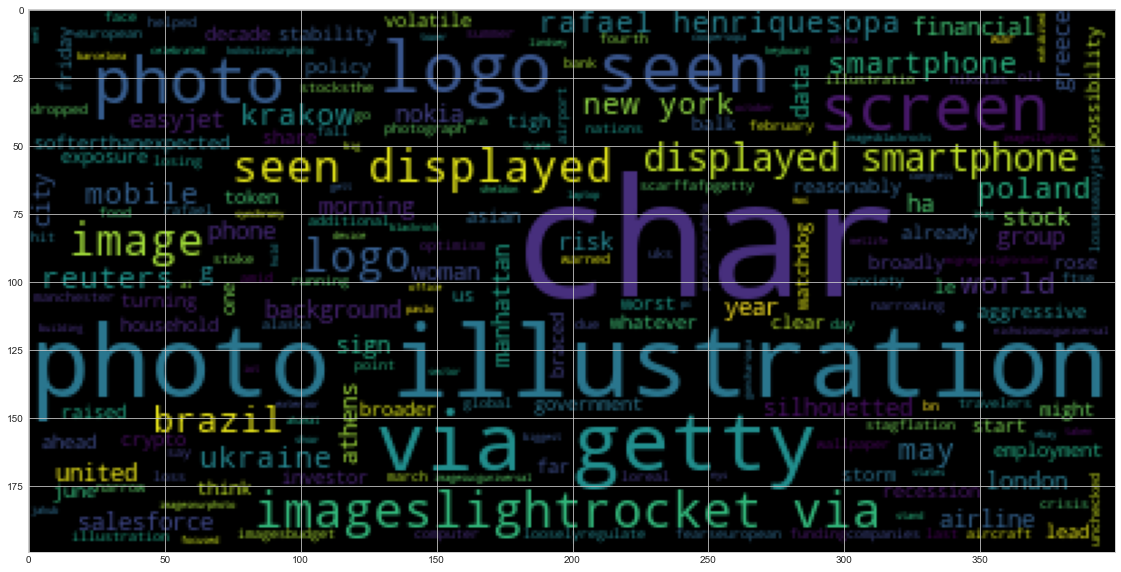

In [20]:
# Generate the word cloud
sp_wc = WordCloud().generate(sp_big_string)
plt.imshow(sp_wc)

---
## 3. Named Entity Recognition


In [21]:
import spacy
from spacy import displacy

In [22]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [23]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### NER

In [24]:
# Concatenate all the text together
# Compile the list of texts for each article
sp_text = []
for text in sp_df.text:
    sp_text.append(text)
    
# Convert a list of texts into a single string of texts   
sp_text_string = ' '.join([str(elem) for elem in sp_text])
print(sp_text_string)

LONDON, May 27 (Reuters) - One of the worst starts to a year in decades might lead you to think investors are already braced for an economic storm ahead, but it's far from clear recession risks have … [+5907 chars] June 3 (Reuters) - Asian shares rose broadly on Friday morning after softer-than-expected U.S. employment data raised the possibility of the Federal Reserve turning less aggressive on its policy tigh… [+3203 chars] LONDON, May 25 (Reuters) - Whatever the broader financial or economic stability risks of volatile crypto tokens, government watchdogs may reasonably balk at 10% household exposure to loosely-regulate… [+5856 chars] The United Nations has warned that the war in Ukraine has helped to stoke a global food crisis that could last years if it goes unchecked, as the World Bank announced an additional $12bn in funding t… [+5387 chars] EasyJet narrows losses
Easyjet aircraft at Manchester Airport Photograph: Oli Scarff/AFP/Getty Images
Budget airline easyJet says it faces s

In [25]:
# Run the NER processor on all of the text
sp_doc = nlp(sp_text_string)

# Add a title to the document
sp_doc.user_data["title"] = "S&P 500 NER"

In [26]:
# Render the visualization
displacy.render(sp_doc, style='ent')

In [27]:
# List all Entities
# Get geopolitical and organizational entities
sp_entities = [ent.text for ent in sp_doc.ents if ent.label_ in ['GPE', 'ORG']]
print(sp_entities)

['LONDON', 'Reuters', 'Reuters', 'U.S.', 'the Federal Reserve', 'LONDON', 'Reuters', '+5856', 'The United Nations', 'Ukraine', 'the World Bank', 'EasyJet', 'Alaska Airlines', 'Athens', 'Greece', 'BRAZIL', 'Travelers Companies', 'Getty Images', "L'Oreal", 'Athens', 'Greece', 'NurPhoto', 'Getty Images', 'NurPhoto', 'MetLife', 'MET', 'Getty Images', 'MANHATTAN', 'NEW YORK', 'UNITED STATES', 'New York City', 'Getty Images', 'Getty Images\r\nBlackRocks', 'NYS', 'Manhattan', 'New York', 'Nicholson/UCG/Universal Images Group', 'Getty Images', 'UCG/Universal Images Group', 'BRAZIL', 'eBay', 'Krakow', 'Poland', 'NurPhoto', 'Nokia', 'Nokia', 'the Mobile World Congress', 'G', 'IOT', 'AI', 'Barcelona', 'Synchrony Financial', 'BRAZIL', 'the Cisco Systems, Inc. logo', 'POLAND - 2018/09/27', 'Motorola Solutions', 'Czerwone Maki', 'Krakow', 'Poland', 'Outsourcing Destinations', 'UKRAINE', 'Pioneer Natural Resources', 'BRAZIL', 'the Caesars Entertainment Corporation']


---

---